# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [14]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'



In [149]:
df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [150]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [103]:
biv_sex = pd.crosstab(df['sex'], 
                      df['flag_doente'], 
                      margins=True,
                      margins_name= 'Total').rename(index={0:'mulheres', 1:'homens'}, columns={0:'saudaveis', 1:'doentes'})

biv_sex['qnt_media_doentes'] = biv_sex['doentes']/ biv_sex['Total']
biv_sex['qnt_media_saudaveis'] = biv_sex['saudaveis']/ biv_sex['Total']

biv_sex['odds'] = biv_sex['doentes']/ biv_sex['saudaveis']
biv_sex['odds_ratio'] = biv_sex['odds']/ biv_sex.loc['Total', 'odds']

biv_sex['logito'] = np.log(biv_sex['odds'])
biv_sex['WOE'] = np.log(biv_sex['odds_ratio'])

biv_sex

flag_doente,saudaveis,doentes,Total,qnt_media_doentes,qnt_media_saudaveis,odds,odds_ratio,logito,WOE
sex,,,,,,,,,
mulheres,72,25,97,0.257732,0.742268,0.347222,0.409672,-1.057790,-0.892398
homens,92,114,206,0.553398,0.446602,1.239130,1.461996,0.214410,0.379802
Total,164,139,303,0.458746,0.541254,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [104]:
ages_cat = pd.qcut(x=df.age,q=5)

biv_age = pd.crosstab(df['age'], 
                      df['flag_doente'], 
                      margins=True,
                      margins_name= 'Total').rename(columns={0:'saudaveis', 1:'doentes'})


biv_age['age_cat'] = ages_cat
biv_age = biv_age.groupby('age_cat').agg('sum')

biv_age

flag_doente,saudaveis,doentes,Total
age_cat,,,
"(28.999, 45.0]",41,22,63
"(45.0, 53.0]",26,40,66
"(53.0, 58.0]",35,43,78
"(58.0, 62.0]",37,22,59
"(62.0, 77.0]",25,12,37


In [105]:
biv_age = (pd.concat(objs=[biv_age, 
                           pd.DataFrame(data=biv_age.sum(axis=0), 
                                        columns=['Total']).T]))

biv_age

flag_doente,saudaveis,doentes,Total
"(28.999, 45.0]",41,22,63
"(45.0, 53.0]",26,40,66
"(53.0, 58.0]",35,43,78
"(58.0, 62.0]",37,22,59
"(62.0, 77.0]",25,12,37
Total,164,139,303


In [106]:
biv_age['qnt_media_doentes'] = biv_age['doentes']/ biv_age['Total']
biv_age['qnt_media_saudaveis'] = biv_age['saudaveis']/ biv_age['Total']

biv_age['odds'] = biv_age['doentes']/ biv_age['saudaveis']
biv_age['odds_ratio'] = biv_age['odds']/ biv_age.loc['Total', 'odds']

biv_age['logito'] = np.log(biv_age['odds'])
biv_age['WOE'] = np.log(biv_age['odds_ratio'])

biv_age

flag_doente,saudaveis,doentes,Total,qnt_media_doentes,qnt_media_saudaveis,odds,odds_ratio,logito,WOE
"(28.999, 45.0]",41,22,63,0.349206,0.650794,0.536585,0.633094,-0.622530,-0.457137
"(45.0, 53.0]",26,40,66,0.606061,0.393939,1.538462,1.815163,0.430783,0.596175
"(53.0, 58.0]",35,43,78,0.551282,0.448718,1.228571,1.449538,0.205852,0.371245
"(58.0, 62.0]",37,22,59,0.372881,0.627119,0.594595,0.701536,-0.519875,-0.354483
"(62.0, 77.0]",25,12,37,0.324324,0.675676,0.480000,0.566331,-0.733969,-0.568577
Total,164,139,303,0.458746,0.541254,0.847561,1.000000,-0.165392,0.000000


In [213]:
df2 = df.copy()
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


In [215]:
df2['cat_idade'] = pd.qcut(x=df2.age,q=5)
df2 = df2.groupby('cat_idade').mean('age')
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num,flag_doente
cat_idade,,,,,,,,,,,,,
"(28.999, 45.0]",41.222222,0.714286,2.952381,123.746032,230.460317,0.047619,0.761905,163.809524,0.238095,0.674603,1.460317,0.492063,0.253968
"(45.0, 53.0]",50.000000,0.734375,3.156250,127.546875,238.609375,0.187500,0.875000,153.796875,0.281250,0.743750,1.468750,0.656250,0.343750
"(53.0, 58.0]",56.211268,0.690141,3.239437,132.788732,254.112676,0.169014,1.140845,145.323944,0.408451,1.190141,1.704225,1.169014,0.549296
"(58.0, 62.0]",60.355556,0.666667,3.288889,139.577778,247.488889,0.177778,1.022222,144.133333,0.377778,1.506667,1.711111,1.333333,0.711111
"(62.0, 77.0]",66.516667,0.583333,3.183333,137.233333,262.983333,0.166667,1.150000,139.400000,0.333333,1.210000,1.683333,1.133333,0.500000


In [218]:
df_mean_age = df2[['age']]
df_mean_age

,age
cat_idade,
"(28.999, 45.0]",41.222222
"(45.0, 53.0]",50.000000
"(53.0, 58.0]",56.211268
"(58.0, 62.0]",60.355556
"(62.0, 77.0]",66.516667


In [227]:
biv_age_final = pd.concat([biv_age, df_mean_age], axis = 1)

biv_age_final['age'] = round(biv_age_final['age'])
biv_age_final.loc['Total', 'age'] = round(df['age'].mean())
biv_age_final = biv_age_final.rename(columns={'age': 'mean_age'})

biv_age_final

,saudaveis,doentes,Total,qnt_media_doentes,qnt_media_saudaveis,odds,odds_ratio,logito,WOE,mean_age
"(28.999, 45.0]",41,22,63,0.349206,0.650794,0.536585,0.633094,-0.622530,-0.457137,41.0
"(45.0, 53.0]",26,40,66,0.606061,0.393939,1.538462,1.815163,0.430783,0.596175,50.0
"(53.0, 58.0]",35,43,78,0.551282,0.448718,1.228571,1.449538,0.205852,0.371245,56.0
"(58.0, 62.0]",37,22,59,0.372881,0.627119,0.594595,0.701536,-0.519875,-0.354483,60.0
"(62.0, 77.0]",25,12,37,0.324324,0.675676,0.480000,0.566331,-0.733969,-0.568577,67.0
Total,164,139,303,0.458746,0.541254,0.847561,1.000000,-0.165392,0.000000,54.0


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

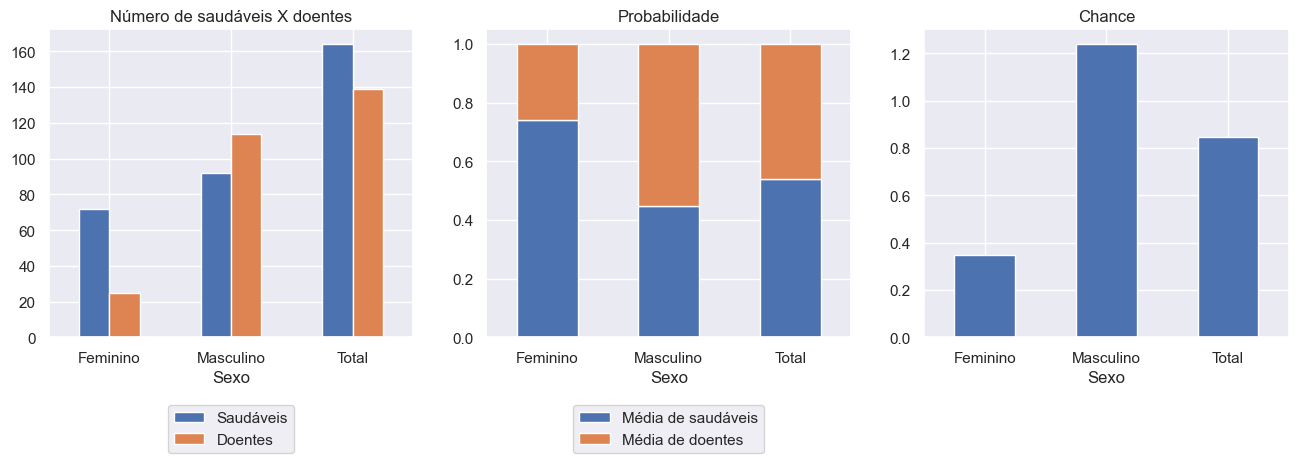

In [166]:
sns.set_theme()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

ax0 = biv_sex[['saudaveis', 'doentes']].plot.bar(ax=axes[0])
ax0.set_title(label='Número de saudáveis X doentes')
ax0.set_xlabel(xlabel='Sexo')
ax0.set_xticklabels(labels=['Feminino', 'Masculino', 'Total'], rotation=0)
ax0.legend(labels=['Saudáveis', 'Doentes'], loc=8, bbox_to_anchor=(0.5, -.4))

ax1 = biv_sex[['qnt_media_saudaveis', 'qnt_media_doentes']].plot.bar(ax=axes[1], stacked=True)
ax1.set_title(label='Probabilidade')
ax1.set_xlabel(xlabel='Sexo')
ax1.set_xticklabels(labels=['Feminino', 'Masculino', 'Total'], rotation=0)
ax1.legend(labels=['Média de saudáveis', 'Média de doentes'], loc=8, bbox_to_anchor=(0.5, -.4))

ax2 = biv_sex['odds'].plot.bar(ax=axes[2])
ax2.set_title(label='Chance')
ax2.set_xlabel(xlabel='Sexo')
ax2.set_xticklabels(labels=['Feminino', 'Masculino', 'Total'], rotation=0)

plt.show()

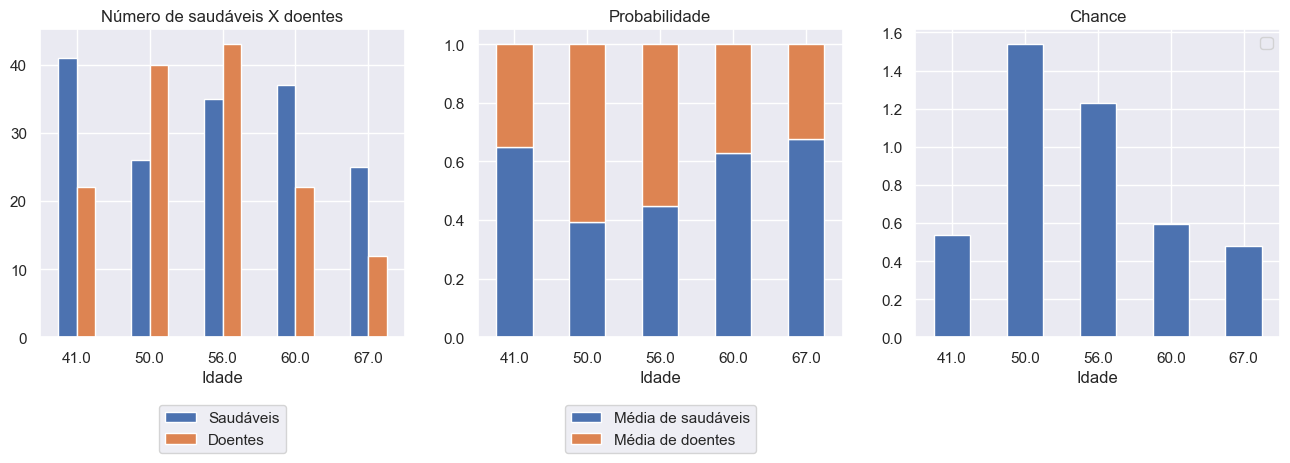

In [228]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

ax0 = biv_age_final.iloc[:-1,].plot.bar(x='mean_age', y=['saudaveis', 'doentes'], ax=axes[0])
ax0.set_title(label='Número de saudáveis X doentes')
ax0.set_xlabel(xlabel='Idade')
ax0.set_xticklabels(labels=ax0.get_xticklabels(), rotation=0)
ax0.legend(labels=['Saudáveis', 'Doentes'], loc=8, bbox_to_anchor=(0.5, -.4))

ax1 = biv_age_final.iloc[:-1].plot.bar(y=['qnt_media_saudaveis', 'qnt_media_doentes'], ax=axes[1], stacked=True)
ax1.set_title(label='Probabilidade')
ax1.set_xlabel(xlabel='Idade')
ax1.set_xticklabels(labels=ax0.get_xticklabels(), rotation=0)
ax1.legend(labels=['Média de saudáveis', 'Média de doentes'], loc=8, bbox_to_anchor=(0.5, -.4))

ax2 = biv_age_final.iloc[:-1].plot.bar(y='odds', ax=axes[2])
ax2.set_title(label='Chance')
ax2.set_xlabel(xlabel='Idade')
ax2.set_xticklabels(labels=ax0.get_xticklabels(), rotation=0)
ax2.legend(labels='')

plt.show()